Import Necessary Library

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [75]:
df=pd.read_csv('/content/Ice_cream selling data.csv')
df
lreg=LinearRegression()
preg=PolynomialFeatures(degree=2)

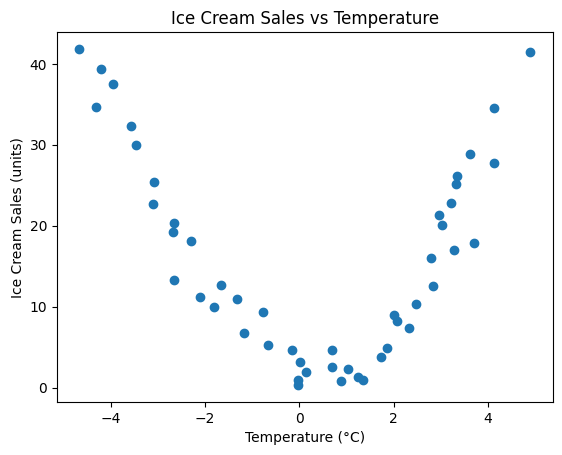

In [76]:
X = df.iloc[:, :-1].values  # All columns except the last one as features
y = df.iloc[:, -1].values   # just last column as the target
plt.scatter(X,y)
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title('Ice Cream Sales vs Temperature')
plt.show()


In [77]:
df.isnull().sum()


,0
Temperature (°C),0
Ice Cream Sales (units),0


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [79]:
X_test

array([[ 1.35981267],
       [-3.57855372],
       [ 0.87490503],
       [ 1.74000001],
       [ 1.99931037],
       [ 2.83176021],
       [ 2.31859124],
       [ 3.21136614],
       [-3.08130332],
       [-2.65149803]])

**Linear Regression VS Polynomial Regression**
**bold text**

*   Polynomial Regression


In [80]:
lreg.fit(X_train, y_train)
y_pred_lreg = lreg.predict(X_test)
mse_lreg = mean_squared_error(y_test, y_pred_lreg)
print("Linear Regression MSE:", mse_lreg)

Linear Regression MSE: 107.52072850026534


In [81]:
lreg.score(X_test,y_test)

-0.02557459798788897

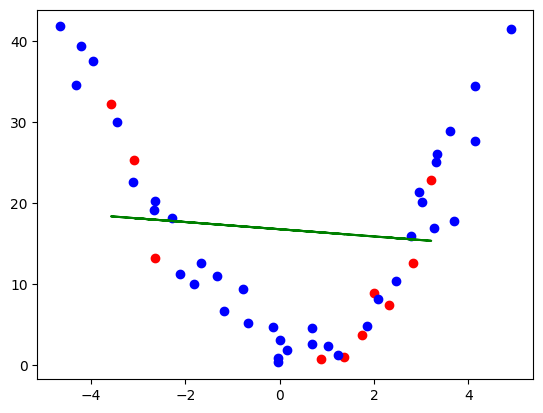

In [82]:
plt.scatter(X_test, y_test, color='red')
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_test, y_pred_lreg, color='green')

.Polynomial Regression

In [83]:
pl=preg.fit_transform(X_train)
pl.shape

(39, 3)

In [84]:
lreg.fit(pl,y_train)

LinearRegression()

In [85]:
lreg.score(pl,y_train)

0.9384567189055858

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
mse_for_train=mean_squared_error(y_train,lreg.predict(pl))
mse_for_train

9.550879189587246

In [88]:
mse_for_test=mean_squared_error(y_test,lreg.predict(preg.fit_transform(X_test)))
mse_for_test

13.086802211382846

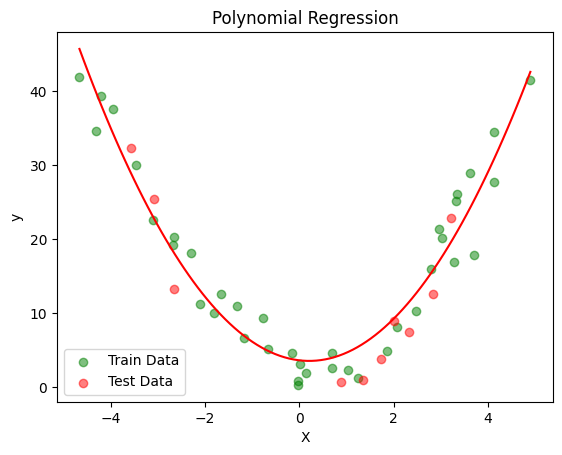

In [89]:
  # Plot only if there's one feature for visualization

plt.scatter(X_train,y_train, color="green", label="Train Data", alpha=0.5)
plt.scatter(X_test,y_test, color="red", label="Test Data", alpha=0.5)
# Generate a smooth line for polynomial prediction
X_grid = np.linspace(min(X), max(X), 100).reshape(-1, 1)
X_grid_poly = preg.transform(X_grid)
y_grid_pred = lreg.predict(X_grid_poly)

plt.plot(X_grid, y_grid_pred, color="red")
plt.title("Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()